<a href="https://colab.research.google.com/github/dimaakapout/MyProjects/blob/master/0001Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

keras = tf.keras
L = keras.layers

In [0]:
#import requests
import tensorflow.keras.applications as zoo # как зоопарк подгружаем, азазазазаз

In [0]:
model = zoo.ResNet50(include_top=True, weights='imagenet')

In [0]:
model.summary()

In [0]:
keras.utils.plot_model(model, to_file='CNN_FM_2.png', 
                       show_shapes=True, # Показывать размерность входов и выходов слоя
                       show_layer_names = False, # Показывать имена слоев
                       dpi=100)

In [0]:
model.output

In [7]:
href = 'https://s1.1zoom.ru/big3/890/Foxes_461715.jpg'
_ = keras.utils.get_file('j1pg.jpg', href)

9494528/9486816 [==============================] - 3s 0us/step


In [8]:
print(_) # куда скачался то?! 



/root/.keras/datasets/j1pg.jpg


In [36]:
import PIL.Image
import numpy as np
from keras.applications.resnet50 import decode_predictions


input_shape = model.layers[0].output_shape[0][1:3]

href = 'https://wallpaperscave.com.ua/images/original/18/04-03/animals-foxes-36710.jpg'
image = keras.utils.get_file('fox.jpg', href)

print(image) # куда скачался то?! 

image = PIL.Image.open(image).resize(input_shape)
image = np.array(image)/255.0
result = model.predict(image[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

decode_predictions(result, top=5)[0]

/root/.keras/datasets/fox.jpg


[('n01930112', 'nematode', 0.15027452),
 ('n03041632', 'cleaver', 0.035696987),
 ('n03838899', 'oboe', 0.031525094),
 ('n04270147', 'spatula', 0.023695515),
 ('n03476684', 'hair_slide', 0.022099817)]

In [0]:
def predict(image_path):
    # Подгружаем изображение и делаем его ресайз в соответсвии с моделью
    img = PIL.Image.open(image_path)
    
    # переделали в массив, обрезали 
    img = image_center_crop(np.array(img)) 
    
    # вернули назад в картинку, сделали resize 
    img_resized = PIL.Image.fromarray(img).resize(input_shape)

    # Рисуем картинку
    plt.imshow(img_resized)
    plt.show()

    # Кнвертируем картинку в numpy и делаем лишнюю размерность
    img_array = np.array(img_resized)[np.newaxis, ...]

    # VGG-16 строит нам прогноз
    pred = model.predict(img_array)
    
    # Декодируем прогноз
    pred_decoded = decode_predictions(pred)[0]

    # Печатаем его на экран
    for code, name, score in pred_decoded:
        print("{0:>6.2%} : {1}".format(score, name))

def save_image(href, save_name):
    '''
    Возвращает путь к файлу
    '''
    img = keras.utils.get_file(save_name, href)
    return img

def image_center_crop(img):
    w = img.shape[0]
    h = img.shape[1]
    if w > h :
        cropped_img = img[(w-h)//2:w-(w-h)//2,:,:]
    elif w < h:
        cropped_img = img[:,(h-w)//2:h-(h-w)//2,:]
    else:
        cropped_img = img
    return cropped_img

8404992/8401604 [==============================] - 2s 0us/step


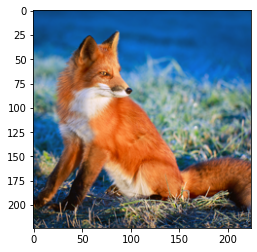

31.36% : grey_fox
22.99% : white_wolf
20.37% : Arctic_fox
 9.07% : red_fox
 7.10% : kit_fox


In [43]:
href = 'https://wallpaperscave.com.ua/images/original/18/04-03/animals-foxes-36710.jpg'

path = save_image(href, 'cat_doag_ful21.jpg')
predict(path)

In [0]:
image_path = save_image('https://wallpaperscave.com.ua/images/original/18/04-03/animals-foxes-36710.jpg', 'n.jpg')
img = PIL.Image.open(image_path)
# переделали в массив, обрезали 
img = image_center_crop(np.array(img)) 
img_resized = PIL.Image.fromarray(img).resize(input_shape)
img_array = np.array(img_resized)[np.newaxis, ...]
pred = model.predict(img_array)
pred_decoded = decode_predictions(pred)[0]

In [70]:
pred_decoded

[('n02120505', 'grey_fox', 0.3135771),
 ('n02114548', 'white_wolf', 0.22991814),
 ('n02120079', 'Arctic_fox', 0.20374767),
 ('n02119022', 'red_fox', 0.090687096),
 ('n02119789', 'kit_fox', 0.07097552)]

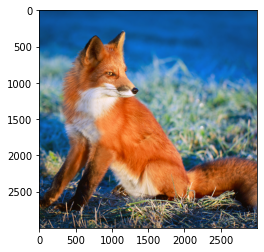

In [66]:
plt.imshow(img)